Importing the dependencies and packages 


In [206]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
%matplotlib inline

Reading the data from the file using pandas 

In [207]:
scores_df=pd.read_csv('test_scores.csv')

In [208]:
# preview the first five rows of data 
scores_df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


Getting initial statistics and description about the dataset

In [209]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


From the above information we see that there are 3 numerical features and 8 categorical features.Also there are 2133 rows and non null
We validate this by doing null check to determine if there is any null or missing value

In [210]:
scores_df.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

As seen above that there are no missing and null values in the data

In [211]:
scores_df.shape

(2133, 11)

In [212]:
scores_df.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


From the above statistics there are 3 numeric columns and 8 categorical.
Out of 8 categorical columns student_id is unique for each student and hence can be excluded as part of attributes contributing to posttest scores

##### Analyzing categorical columns

In [213]:
#capturing the relevant categorical columns 
cat_columns = ['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'gender', 'lunch']

Finding unique values and their counts for each categorical column 

In [214]:
def valuesCounts(df):
    for feature in cat_columns:
        print(df[feature].value_counts())

In [215]:
valuesCounts(scores_df)

GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64
Urban       906
Suburban    717
Rural       510
Name: school_setting, dtype: int64
Public        1582
Non-public     551
Name: school_type, dtype: int64
18K    31
QA2    30
A93    30
Q0E    30
ZBH    30
       ..
KR1    15
SSP    15
IQN    15
197    14
JGD    14
Name: classroom, Length: 97, dtype: int64
Standard        1373
Experimental     760
Name: teaching_method, dtype: int64
Male      1077
Female    1056
Name: gender, dtype: int64
Does not qualify                    1215
Qualifies for reduced/free lunch     918
Name: lunch, dtype: int64


Grouping data by each categorical column and determining the mean posttest score to identify how each category impacts the score

In [216]:
def groupbyFeature(df):
    for feature in cat_columns:
        print(df.groupby(feature)['posttest'].mean())

In [217]:
groupbyFeature(scores_df)

school
ANKYI    71.390244
CCAAW    78.110092
CIMBB    76.945946
CUQAM    65.560748
DNQDD    66.565574
FBUMG    78.608696
GJJHK    65.025424
GOKXL    64.953125
GOOBU    49.613924
IDGFP    87.223404
KFZMY    54.576923
KZKKE    47.918919
LAYPA    73.508772
OJOBU    67.814815
QOQTS    64.671141
UAGPU    71.873563
UKPGS    91.164062
UUUQX    79.261905
VHDHF    66.843137
VKWQH    64.820000
VVTVA    49.175439
ZMNYA    81.608696
ZOWMK    52.905983
Name: posttest, dtype: float64
school_setting
Rural       64.050980
Suburban    76.037657
Urban       61.748344
Name: posttest, dtype: float64
school_type
Non-public    75.961887
Public        64.016435
Name: posttest, dtype: float64
classroom
05H    83.363636
08N    93.857143
0N7    60.785714
18K    56.032258
197    77.928571
         ...    
YTB    48.433333
YUC    55.761905
ZBH    49.766667
ZDT    64.259259
ZNS    68.761905
Name: posttest, Length: 97, dtype: float64
teaching_method
Experimental    72.982895
Standard        63.847050
Name: posttest

Plotting the above information using bar plot and identify how the scores vary for each value

cat_columns = ['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'gender', 'lunch']

<AxesSubplot:xlabel='school', ylabel='posttest'>

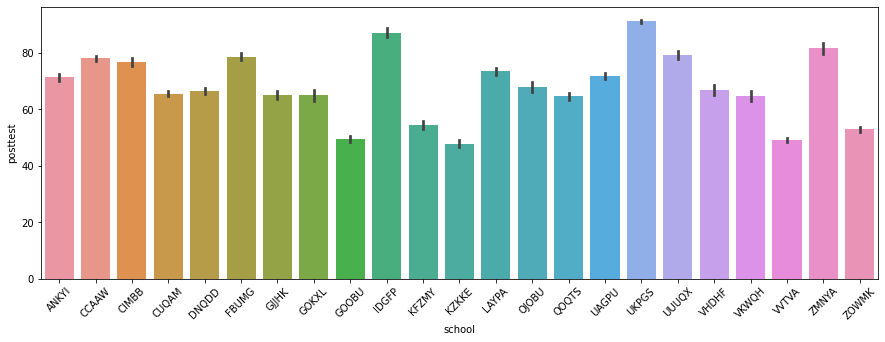

In [218]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x='school',y='posttest',data=scores_df)

<AxesSubplot:xlabel='school_setting', ylabel='posttest'>

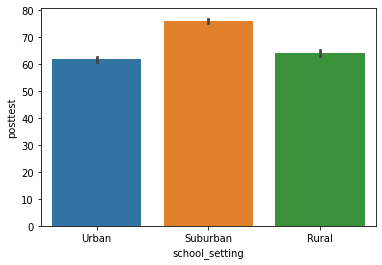

In [219]:
sns.barplot(x='school_setting',y='posttest',data=scores_df)

<AxesSubplot:xlabel='school_type', ylabel='posttest'>

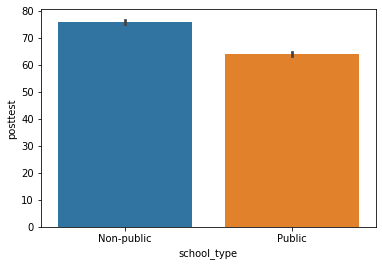

In [220]:
sns.barplot(x='school_type',y='posttest',data=scores_df)

<AxesSubplot:xlabel='classroom', ylabel='posttest'>

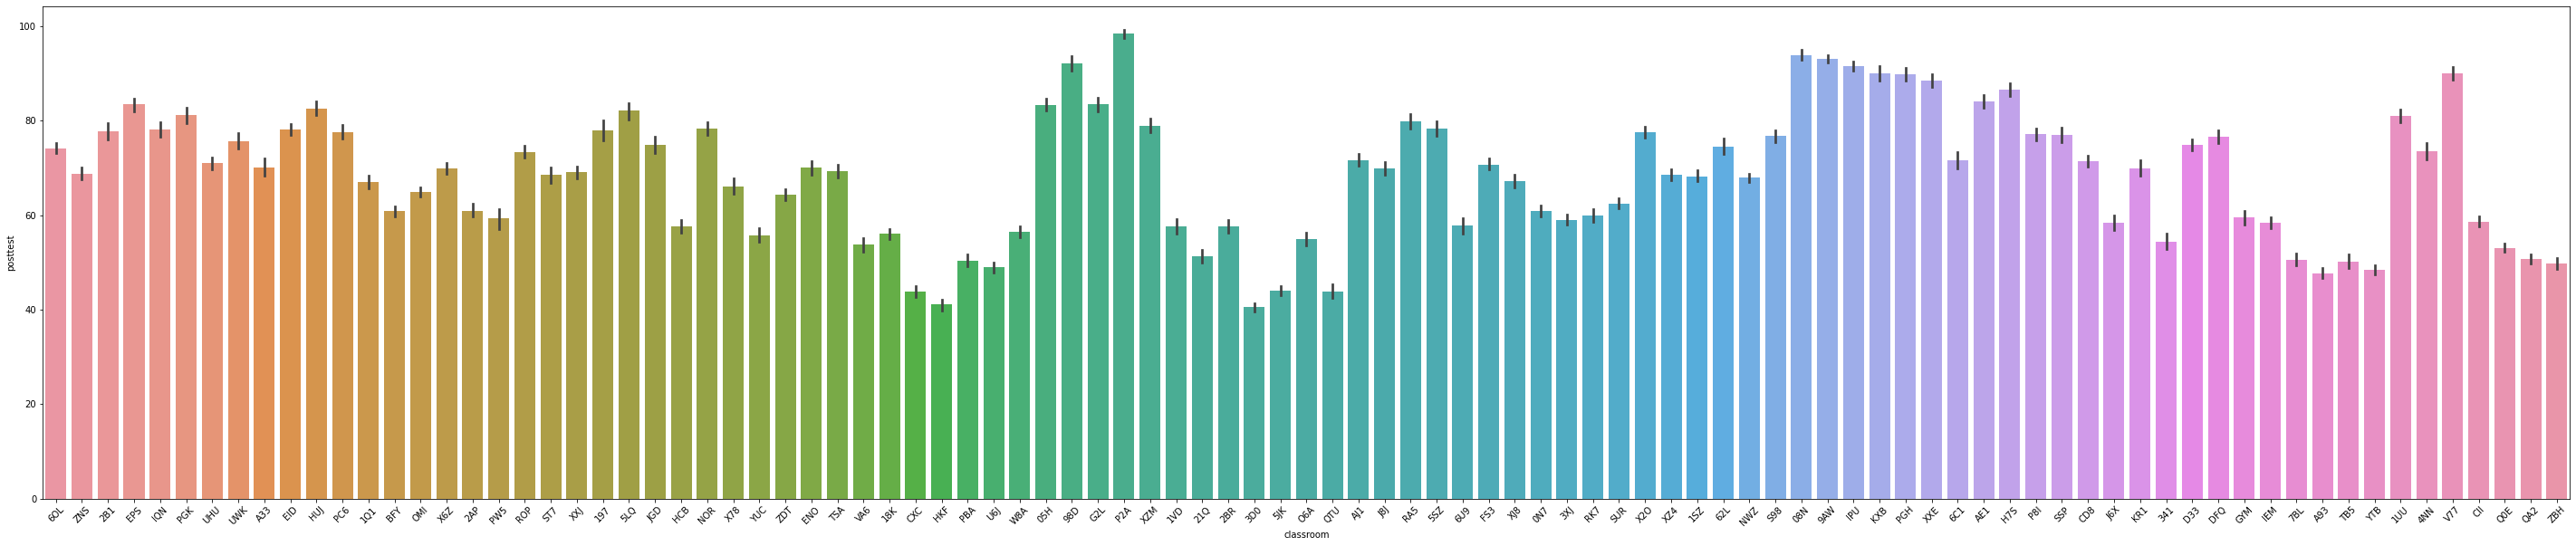

In [221]:
plt.figure(figsize=(50,10))
plt.xticks(rotation=45)
sns.barplot(x='classroom',y='posttest',data=scores_df)

<AxesSubplot:xlabel='teaching_method', ylabel='posttest'>

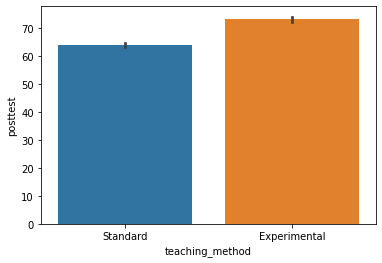

In [222]:
sns.barplot(x='teaching_method',y='posttest',data=scores_df)

<AxesSubplot:xlabel='gender', ylabel='posttest'>

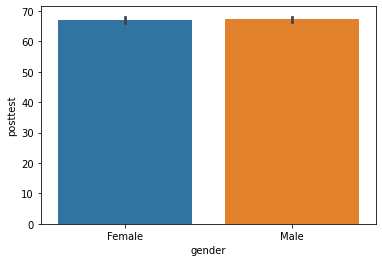

In [223]:
sns.barplot(x='gender',y='posttest',data=scores_df)

<AxesSubplot:xlabel='lunch', ylabel='posttest'>

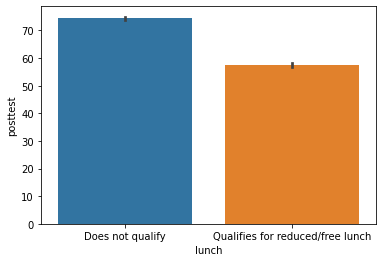

In [224]:
sns.barplot(x='lunch',y='posttest',data=scores_df)

Observations from the plots above 
- For some schools the scores have been high while for some its been low. Thus school can be one of the factor to determin the score of student 
- Students with suburban school setting tend to score more than students who are in schools with rural and urban setting 
- Students of non-public schools score more than public schools
- Variation in the scores depending on the type of classrooms the student in studying. Therefore it can be one of the factor to determine the student's score
- Students who have been taught with exeprimental way of teaching have score more than those who have been taught with standard way
- Gender seems to have no impact on the final score as both male and female have similarly on average
- Student who dont qualify for lunch tend to score better than those who qualified for free or subsidized lunch 

Thus from the categorical variable we can choose the following features 
- School
- School_Setting
- School_Type
- Classroom
- Teaching_Method
- Lunch

###### Analyzing the numerical columns

In [225]:
scores_df.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


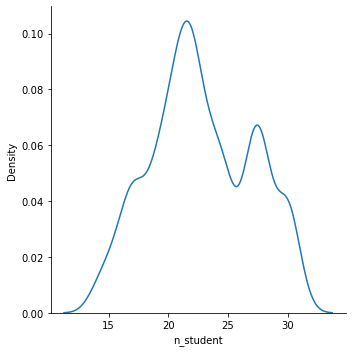

In [226]:
sns.displot(data=scores_df,x='n_student',kind='kde')

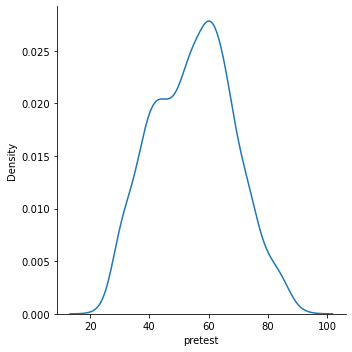

In [227]:
sns.displot(data=scores_df,x='pretest',kind='kde')

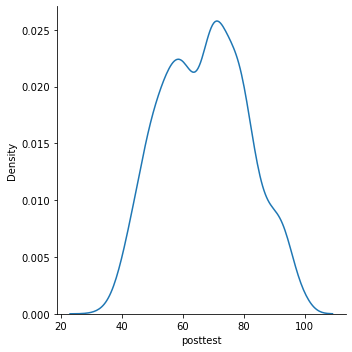

In [228]:
sns.displot(data=scores_df,x='posttest',kind='kde')

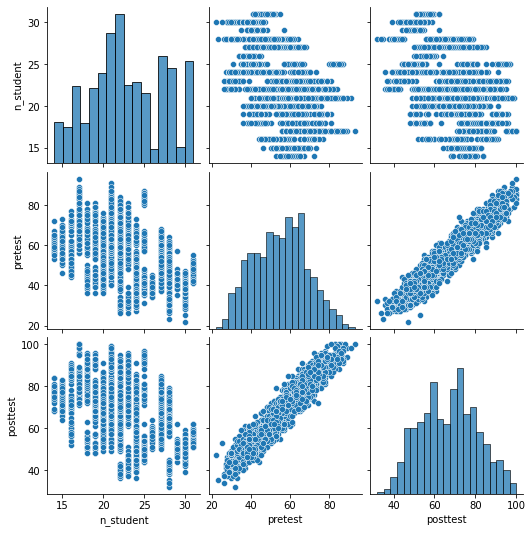

In [229]:
sns.pairplot(scores_df)

As seen from the above pair plot the post-test score shows increasing trend as the values of pre-test.Lets find the correlation between various numerical variable to confirm on the finding

In [230]:
scores_df.corr()

,n_student,pretest,posttest
n_student,1.000000,-0.499253,-0.504886
pretest,-0.499253,1.000000,0.950884
posttest,-0.504886,0.950884,1.000000


In [231]:
corelation= scores_df.corr()

<AxesSubplot:>

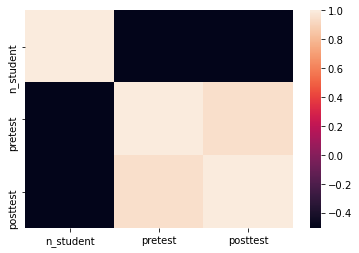

In [232]:
sns.heatmap(corelation)

As seen from above that posttest scores are highly corelated with pre-test scores

This means that those students who scored high in pre-test are more likely to score more in the post-test as well.

On the other hand the scores are inversely corelated with number of students in the class.

As the students in the class increase the overall score tends to decrease.

In [233]:
### Dropping the columns- student_id, gender
scores_df.drop(columns=['gender','student_id'],inplace=True)

In [234]:
scores_df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,Does not qualify,64.0,76.0


In [235]:
#Separating the dependent feature and the independent features
X= scores_df.drop(columns=['posttest'])
Y= scores_df['posttest']

##### Train Test split

In [236]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [237]:
X_train.shape

(1706, 8)

In [238]:
Y_train.shape

(1706,)

##### Handling categorical variables and encoding them 
Before modelling we need to encode the categorical variables so that they can be fed to the regression model.
For less categorical valued columns we will be using one-hot encoding while for large categorical valued columns (e.g. classroom type) we will use Label encoding 



In [239]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEncoder=LabelEncoder()
labelEncoder.fit(X_train['classroom'])
X_train['classroom']=labelEncoder.transform(X_train['classroom'])

<ipython-input-239-b5027e69cf79>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['classroom']=labelEncoder.transform(X_train['classroom'])


In [240]:
X_test['classroom']=labelEncoder.transform(X_test['classroom'])


<ipython-input-240-ba3680066bc7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['classroom']=labelEncoder.transform(X_test['classroom'])


In [241]:
# One hot encoding columns 
ohe_cols=['school','school_setting','school_type','teaching_method','lunch']

In [242]:
ohe_df=X_train[ohe_cols]

Performing one hot encoding for the categorical columns using One Hot Encoder 

In [243]:
from sklearn.compose import make_column_transformer

In [244]:
column_trans= make_column_transformer(
    (OneHotEncoder(sparse=False),ohe_cols),remainder='passthrough'
)

In [245]:
#fit the one hot encoder on the train data set
X_train=column_trans.fit_transform(X_train)

In [246]:
#transform on the test data
X_test=column_trans.transform(X_test)

In [247]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,84.0,25.0,62.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,69.0,17.0,67.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,72.0,21.0,67.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,27.0,19.0,65.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,54.0,18.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,51.0,19.0,62.0
423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,24.0,29.0,39.0
424,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,71.0,28.0,58.0
425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,72.0,21.0,68.0


In [248]:
X_train.shape

(1706, 35)

In [249]:
X_test.shape

(427, 35)

Performing standardization on the data using Standard Scaler

In [250]:
xstdScaler=StandardScaler()

In [251]:
X_train_scaled=xstdScaler.fit_transform(X_train)

In [252]:
X_test_scaled=xstdScaler.transform(X_test)

In [253]:
ystdScaler=StandardScaler()

In [254]:
Y_train_scaled=ystdScaler.fit_transform(np.array(Y_train).reshape(-1,1))

In [255]:
Y_test_scaled=ystdScaler.transform(np.array(Y_test).reshape(-1,1))

Creating Linear Regression Model

In [256]:
linearRegressor= LinearRegression()
linearRegressor.fit(X_train_scaled,Y_train_scaled)

LinearRegression()

In [257]:
linearRegressor.score(X_test_scaled,Y_test_scaled)

0.9408032912058515

In [258]:
linearRegressor.score(X_train_scaled,Y_train_scaled)

0.9520469568122325

In [259]:
predictedLinearRegression = linearRegressor.predict(X_test_scaled)

In [260]:
predictedLinearRegression=ystdScaler.inverse_transform(predictedLinearRegression)

In [261]:
print('mean-squared error LR',mean_squared_error(predictedLinearRegression,Y_test))

mean-squared error LR 11.236992381982887


In [262]:
print('mean-absolute error LR',mean_absolute_error(predictedLinearRegression,Y_test))

mean-absolute error LR 2.6618414161386355


Creating Random Forest Regressor Model

In [263]:
randForest= RandomForestRegressor()

In [264]:
randForest.fit(X_train_scaled,Y_train_scaled)

<ipython-input-264-8e712c199ebb>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randForest.fit(X_train_scaled,Y_train_scaled)


RandomForestRegressor()

In [265]:
randForest.score(X_test_scaled,Y_test_scaled)

0.9352527767383051

In [266]:
predictedRF = randForest.predict(X_test_scaled)

In [267]:
predictedRF=ystdScaler.inverse_transform(predictedRF)

In [268]:
print('mean-squared error RF',mean_squared_error(predictedRF,Y_test))

mean-squared error RF 12.29061664688578


In [269]:
print('mean-absolute error RF',mean_absolute_error(predictedRF,Y_test))

mean-absolute error RF 2.7492050731102937


Creating XGBoost Regressor Model

In [270]:
xgbregressor= XGBRegressor()

In [271]:
xgbregressor.fit(X_train_scaled,Y_train_scaled)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [272]:
xgbpredicted= xgbregressor.predict(X_test_scaled)

In [273]:
xgbpredicted= ystdScaler.inverse_transform(xgbpredicted)

In [274]:
print('mean squared error XGB',mean_squared_error(xgbpredicted,Y_test))

mean squared error XGB 12.606410527076607


In [275]:
print('mean absolute error XGB',mean_absolute_error(xgbpredicted,Y_test))

mean absolute error XGB 2.8038152833174768


In [276]:
xgbregressor.score(X_test_scaled,Y_test_scaled)

0.9335891730142549

Based on the above modelling we see that Linear Regression Performs better than Random Forest and XGBoost 

Giving Accuracy of 95.2 % 

While Random Forest Model gave accuracy of 93.45 % 

and XG Boost gave accuracy of 93.3 % 

As we know that Linear regression models are also vulnerable to outliers 

We can try to hypertune Random Forest Model to check if the accuracy improves 

##### Hyperparameter tuning 

In [277]:
#Building paramters for tuning of random forest 

#number of trees in the random forest 
n_estimators=[int(x) for x in np.linspace(start=50,stop=200,num=10)]

In [278]:
param_grid={'n_estimators':n_estimators}

In [279]:
print(param_grid)

{'n_estimators': [50, 66, 83, 100, 116, 133, 150, 166, 183, 200]}


Using Grid Search CV for performing cross validation 

In case large number of parameters and records we can use Randomized Search CV as well as it is more computationaly efficient


In [280]:
rf_Grid=GridSearchCV(estimator=randForest,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

In [281]:
rf_Grid.fit(X_train_scaled,Y_train_scaled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\80217530\AppData\Local\Continuum\anaconda3\envs\cnnenv\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'n_estimators': [50, 66, 83, 100, 116, 133, 150, 166,
                                          183, 200]},
             verbose=2)

In [282]:
rf_Grid.score(X_test_scaled,Y_test_scaled)

0.9355902318335159

In [283]:
rf_Grid.best_params_

{'n_estimators': 150}

In [284]:
tunedrandForest= RandomForestRegressor(
 n_estimators= 133)

In [285]:
tunedrandForest.fit(X_train_scaled,Y_train_scaled)

<ipython-input-285-921579f85696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tunedrandForest.fit(X_train_scaled,Y_train_scaled)


RandomForestRegressor(n_estimators=133)

In [286]:
tunedrandForest.score(X_test_scaled,Y_test_scaled)

0.9351076800824062

In [287]:
tunedpredictedRF = tunedrandForest.predict(X_test_scaled)

In [288]:
tunedpredictedRF=ystdScaler.inverse_transform(tunedpredictedRF)

In [289]:
print('mean-squared error RF',mean_squared_error(tunedpredictedRF,Y_test))

mean-squared error RF 12.318159563547853


In [290]:
print('mean-absolute error RF',mean_absolute_error(tunedpredictedRF,Y_test))

mean-absolute error RF 2.749160376736929


After hyper parameter tuning the accuracy score improved to 93.6% 

Thus we see that Linear Regression and Random Forest model performs well on the given data.

But Random forest is more robust to outliers and handle multiple features.

Displaying the actual vs Predicted values 

In [291]:
outputDF= pd.concat([Y_test.reset_index(),pd.Series(tunedpredictedRF)],axis=1)

In [292]:
outputDF.drop(columns=['index'],axis=1,inplace=True)

In [293]:
columns=['Actual','Predicted']

In [294]:
outputDF.columns=columns

In [314]:
outputDF.head(20)

,Actual,Predicted
0,76.0,78.462007
1,78.0,83.233083
2,75.0,77.091371
3,71.0,78.735744
4,89.0,94.312030
5,58.0,60.827068
6,48.0,52.629825
7,61.0,60.970909
8,69.0,73.553840
9,85.0,84.155264


<AxesSubplot:>

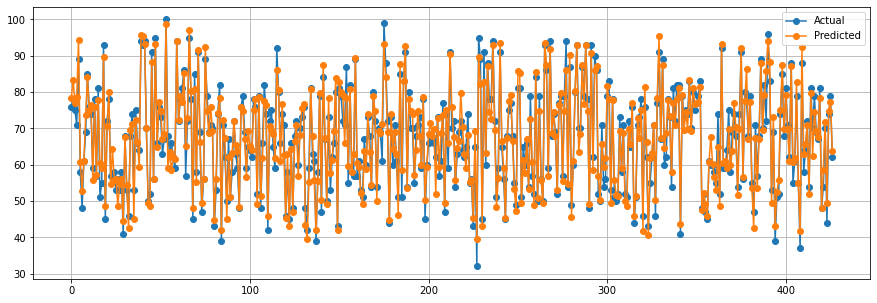

In [313]:
outputDF.plot(figsize=(15,5),grid=True,marker='o')